# Image Segmentation
In this project we  test grabcut algorithm whose purpose is foreground extraction.

In [65]:
import pandas as pd
from zipfile import ZipFile
import ast
from urllib.request import urlretrieve
from PIL import Image
import shapely.geometry
import os
import numpy as np
import matplotlib.pylab as plt
import cv2


class WindowData:
    def __init__(self, download=True, filename='data.zip', shuffle=False):
        self.filename = filename
        self.shuffled = shuffle
        if not os.path.isfile(filename):
            if download:
                _, status = urlretrieve('http://teams.cec.miamioh.edu/Vision/facades/windows.zip', filename=filename)
                #TODO check status
            else:
                assert False, "No Data!"
        self.data = ZipFile(self.filename)
        self.dataframe = pd.read_csv(self.data.open('windows.csv'), index_col='id')
        if shuffle:
            self.dataframe = self.dataframe.sample(frac=1)
    
    def meta(self, index):
        return self.dataframe.iloc[index]
    
    def image_path(self, index):
        return f'windows/{self.meta(index).name}.jpg'
    
    def image(self, index):
        return Image.open(self.data.open(self.image_path(index)))
    
    def polygon(self, index):
        return np.array(ast.literal_eval(self.meta(index).local_polygon))
    
    def shape(self, index):
        """Shapely shape for the window 
        supports many geometric operations like 'buffer', 'intersect', 'interpolate', etc. """
        return shapely.geometry.Polygon(self.polygon(index))
        
    def plot(self, index, ax=None, **kwargs):
        ax = ax or plt.gca()
        image = self.image(index)
        poly = self.polygon(index)
        ax.imshow(image)
        ax.add_patch(plt.Polygon(poly, **kwargs))
        
    def __getitem__(self, index):
        return self.image(index), self.shape(index)
    
    def __len__(self): 
        return len(self.dataframe)
    
    def __repr__(self):
        return f'(WindowData with {len(self)} windows, shuffled={self.shuffled})'
        

In [66]:
def get_rect_from_poly(poly):
    min_corner_x = min(poly[0, 0], poly[1, 0], poly[2, 0], poly[3, 0])
    min_corner_y = min(poly[0, 1], poly[1, 1], poly[2, 1], poly[3, 1])
    max_corner_x = max(poly[0, 0], poly[1, 0], poly[2, 0], poly[3, 0])
    max_corner_y = max(poly[0, 1], poly[1, 1], poly[2, 1], poly[3, 1])
    if len(poly) != 4:
        print(poly)
    return (int(min_corner_x), int(min_corner_y), int(max_corner_x - min_corner_x), int(max_corner_y - min_corner_y))

In [68]:
#def compute_iou(imMask, gtMask):
   # for
#     image = imMask
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     #(thresh, im_bw) = cv2.threshold(image, tresh_min, tresh_max, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#     (thresh, im_bw) = cv2.threshold(image, 128, 255, 0)
    
#     #cv2.imwrite('bw_'+'*im_name*', im_bw)
    
#     contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    
#     #set boxA equal to the bounding box from contours, boxB equal to the ground truth box(annotated)
    
#     boxA = bounding_boxes
#     boxB = gtBox
    
    #why is it comparing str vs tuple???
#     print("Box A: ")
#     print(boxA)
#     print("Box B: ")
#     print(boxB)    
    
    #xA = max(boxA[0], boxB[0])
    #yA = max(boxA[1], boxB[1])
    #xB = min(boxA[2], boxB[2])
    #yB = min(boxA[3], boxB[3])
    
    # compute the area of intersection rectangle
    #interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    #boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    #boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    #iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    #print(iou)
    #return iou

In [69]:
def calculate_iou(img, gt_img_name):
    gt_img = cv2.imread(gt_img_name)
    intersection = 0
    union = 0
    print(img.shape)
    print(gt_img.shape)
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if gt_img[r, c, 0] != 0 and gt_img[r,c,1] != 0 and gt_img[r,c,2] != 0 and img[r,c,0] != 0:
                intersection += 1
                union += 1
            elif gt_img[r, c, 0] != 0 and gt_img[r,c,1] != 0 and gt_img[r,c,2] != 0 or img[r,c,0] != 0:
                union += 1
                
    #plot(gt_img)
    
    return gt_img, (intersection / union)



In [70]:
wd = WindowData()
print(wd.image_path(0))
print(wd.meta(0))
print("Hello world")
annotated_list = ["data/windows_annotated/2d3d31ce30a211e99a70613cc4b52a17.png",
"data/windows_annotated/2d3d321430a211e99a70613cc4b52a17.png",
"data/windows_annotated/2d3d325a30a211e99a70613cc4b52a17.png",
"data/windows_annotated/2d3d32a030a211e99a70613cc4b52a17.png",
"data/windows_annotated/2d3d32e630a211e99a70613cc4b52a17.png",
"data/windows_annotated/2d3d332c30a211e99a70613cc4b52a17.png"]

windows/2d3d31ce30a211e99a70613cc4b52a17.jpg
bbox                                  [640.4, 508.4, 756.6, 687.6]
date                                          31-Jul-2017 20:10:35
local_polygon    [[33.60000000000002, 33.60000000000002], [82.6...
name                                                        window
occluded                                                         0
Name: 2d3d31ce30a211e99a70613cc4b52a17, dtype: object
Hello world


# First we test the effect of the size of the region of unknown to the final result. With tight region of interest wraps around the foreground, the region of unknown will be small. With loose region of interest wraps around
# the foreground the region of unknown will be large. The images below show the result of the algorithm when testing on this parameter. The images on the left are the results with tight region; the images in the middle are the results with loose region; the images on the right are the ground truth images. 

(180, 117, 3)
(180, 117, 3)
thickness:  10
IOU_Score:  0.8177199110828834


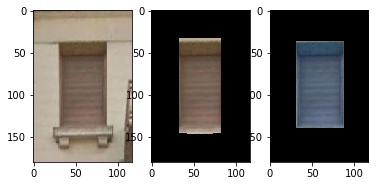

(145, 117, 3)
(145, 117, 3)
thickness:  10
IOU_Score:  0.8432945799901752


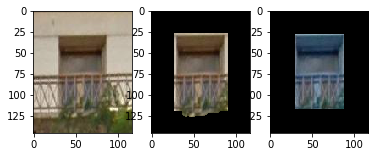

(171, 125, 3)
(171, 125, 3)
thickness:  10
IOU_Score:  0.8402948402948403


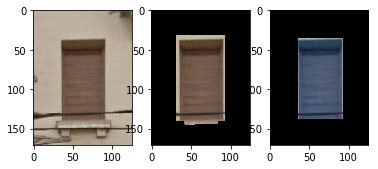

(175, 122, 3)
(175, 122, 3)
thickness:  10
IOU_Score:  0.9158546017014695


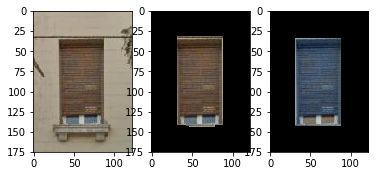

(168, 128, 3)
(168, 128, 3)
thickness:  10
IOU_Score:  0.779889152810768


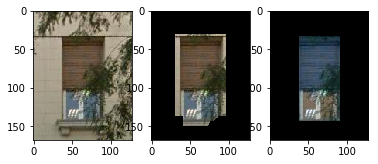

(112, 98, 3)
(112, 98, 3)
thickness:  10
IOU_Score:  0.9009295499021527


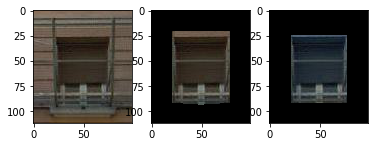

(180, 117, 3)
(180, 117, 3)
thickness:  20
IOU_Score:  0.8203249442497611


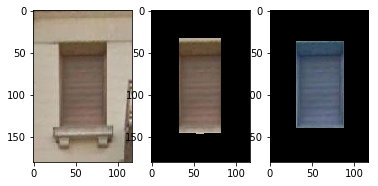

(145, 117, 3)
(145, 117, 3)
thickness:  20
IOU_Score:  0.8599098346969444


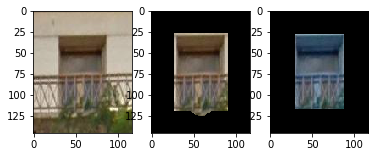

(171, 125, 3)
(171, 125, 3)
thickness:  20
IOU_Score:  0.8556291390728477


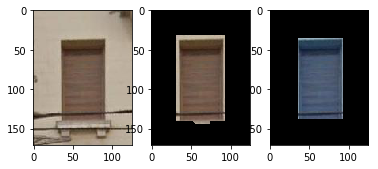

(175, 122, 3)
(175, 122, 3)
thickness:  20
IOU_Score:  0.9156065777226187


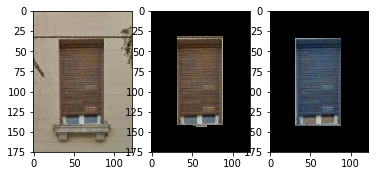

(168, 128, 3)
(168, 128, 3)
thickness:  20
IOU_Score:  0.7809330628803245


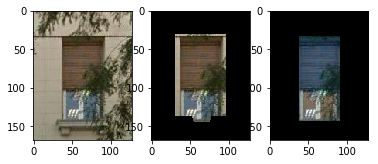

(112, 98, 3)
(112, 98, 3)
thickness:  20
IOU_Score:  0.9051363971491767


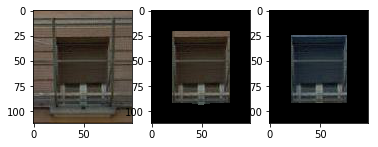

(180, 117, 3)
(180, 117, 3)
thickness:  30
IOU_Score:  0.8216336949585195


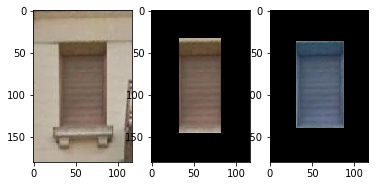

(145, 117, 3)
(145, 117, 3)
thickness:  30
IOU_Score:  0.8743633276740238


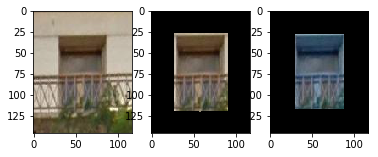

(171, 125, 3)
(171, 125, 3)
thickness:  30
IOU_Score:  0.8682795698924731


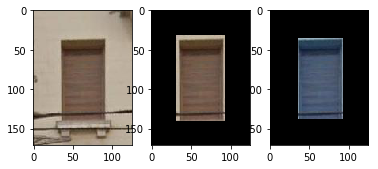

(175, 122, 3)
(175, 122, 3)
thickness:  30
IOU_Score:  0.914814239079745


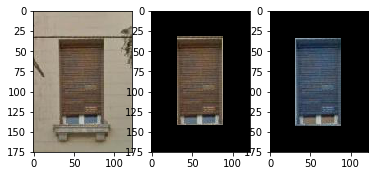

(168, 128, 3)
(168, 128, 3)
thickness:  30
IOU_Score:  0.763764578247898


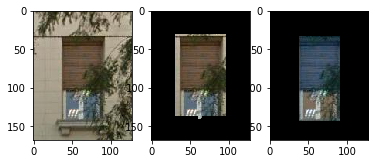

(112, 98, 3)
(112, 98, 3)
thickness:  30
IOU_Score:  0.9100568322213985


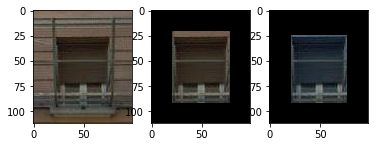

In [74]:
thickness = 0 # thickness length is 2 pixel
for z in range(3):
    thickness +=10
    for i in range(6):
        img, poly = wd[i]
        rect = get_rect_from_poly(wd.polygon(i))
        np_im = np.array(img)
        mask = np.zeros(np_im.shape[:2],np.uint8)
        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)
        for r in range(np_im.shape[0]):
            for c in range(np_im.shape[1]):
                if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                    # inside rect
                    mask[r, c] = cv2.GC_FGD
                elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                    # within ribbon
                    mask[r, c] = cv2.GC_PR_BGD
                else:
                    mask[r, c] = cv2.GC_BGD
        mask, bgdModel, fgdModel = cv2.grabCut(np_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
        mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        final_img = np_im*mask[:,:,np.newaxis]
        f = plt.figure()
        f.add_subplot(1,3, 1)
        plt.imshow(img)
        f.add_subplot(1,3, 2)
        plt.imshow(final_img)
        gt_img, score = calculate_iou(final_img, annotated_list[i])
        f.add_subplot(1,3,3)
        plt.imshow(gt_img)
        print('thickness: ', thickness)
        print('IOU_Score: ', score)
        #print(wd.image_path(i))
        #for i in range(6):
        #    print(wd.image_path(i))
        #print(annotated_list[i])
        #print(calculate_iou(final_img, annotated_list[i]))
#         print(wd.image_path(i))
#         print(final_img.size)
#         print(final_img.shape)
#         print(wd.meta(i).name)
#         print(compute_iou(final_img, wd.meta(i).bbox))
        plt.show()

Next we test the effect of denoising on the final result

(180, 117, 3)
(180, 117, 3)
thickness:  30
IOU_Score:  0.8216336949585195


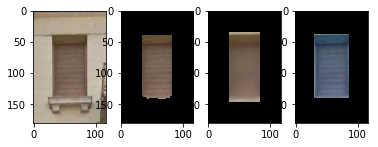

(145, 117, 3)
(145, 117, 3)
thickness:  30
IOU_Score:  0.8746603260869565


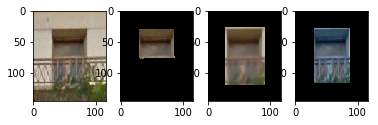

(171, 125, 3)
(171, 125, 3)
thickness:  30
IOU_Score:  0.8682795698924731


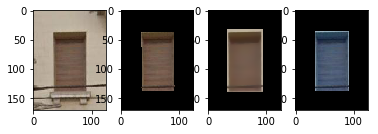

(175, 122, 3)
(175, 122, 3)
thickness:  30
IOU_Score:  0.914814239079745


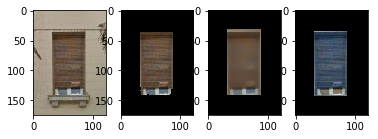

(168, 128, 3)
(168, 128, 3)
thickness:  30
IOU_Score:  0.763764578247898


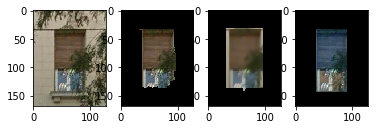

(112, 98, 3)
(112, 98, 3)
thickness:  30
IOU_Score:  0.9100568322213985


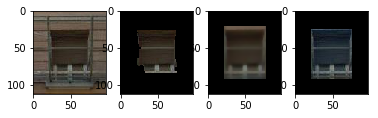

In [82]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

from skimage import data, img_as_float
from skimage.util import random_noise

thickness = 30

for i in range(6):
    img, poly = wd[i]
    rect = get_rect_from_poly(wd.polygon(i))
    np_im = np.array(img)
    #without denoising
    mask = np.zeros(np_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(np_im.shape[0]):
        for c in range(np_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(np_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img = np_im*mask[:,:,np.newaxis]
    
    #with denoising
    denoised_im = (255*denoise_tv_chambolle(np_im, weight=0.1, multichannel=True)).astype(np.uint8)
    
    mask = np.zeros(denoised_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(denoised_im.shape[0]):
        for c in range(denoised_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(denoised_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img2 = denoised_im*mask[:,:,np.newaxis]
    
    # show images
    f = plt.figure()
    f.add_subplot(1,4, 1)
    plt.imshow(img)
    f.add_subplot(1,4, 2)
    plt.imshow(final_img)
    f.add_subplot(1, 4, 3)
    plt.imshow(final_img2)
    gt_img, score = calculate_iou(final_img2, annotated_list[i])
    f.add_subplot(1,4,4)
    plt.imshow(gt_img)
    print('thickness: ', thickness)
    print('IOU_Score: ', score)
    plt.show()




# Here we test the effect of adaptive histogram equalization on the final result

(180, 117, 3)
(180, 117, 3)
thickness:  30
IOU_Score:  0.8213146139119336


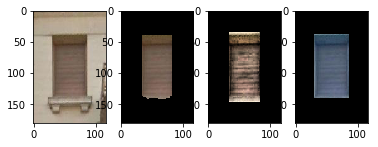

(145, 117, 3)
(145, 117, 3)
thickness:  30
IOU_Score:  0.8736842105263158


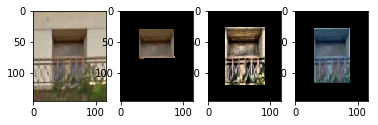

(171, 125, 3)
(171, 125, 3)
thickness:  30
IOU_Score:  0.8682795698924731


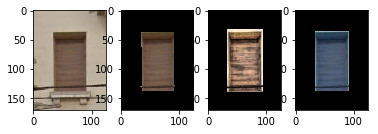

(175, 122, 3)
(175, 122, 3)
thickness:  30
IOU_Score:  0.9141924452044148


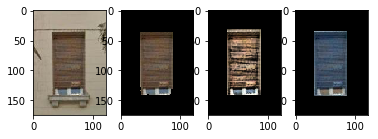

(168, 128, 3)
(168, 128, 3)
thickness:  30
IOU_Score:  0.763764578247898


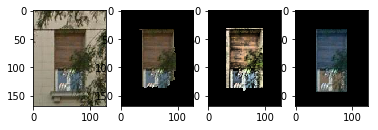

(112, 98, 3)
(112, 98, 3)
thickness:  30
IOU_Score:  0.9098097356066221


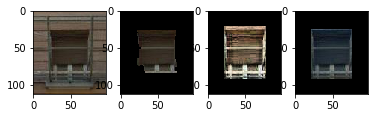

In [85]:
from skimage import exposure

thickness = 30
#img_adapteq = exposure.equalize_adapthist(wd[0], clip_limit=0.03)

for i in range(6):
    img, poly = wd[i]
    rect = get_rect_from_poly(wd.polygon(i))
    np_im = np.array(img)
    #without adaptive histogram equalization
    mask = np.zeros(np_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(np_im.shape[0]):
        for c in range(np_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(np_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img = np_im*mask[:,:,np.newaxis]
    
    #with adaptive histogram equalization
    adapted_im = (255*exposure.equalize_adapthist(np_im, clip_limit=0.03)).astype(np.uint8)
    
    mask = np.zeros(adapted_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(adapted_im.shape[0]):
        for c in range(adapted_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(adapted_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img2 = adapted_im*mask[:,:,np.newaxis]
    
    # show images
    f = plt.figure()
    f.add_subplot(1,4, 1)
    plt.imshow(img)
    f.add_subplot(1,4, 2)
    plt.imshow(final_img)
    f.add_subplot(1, 4, 3)
    plt.imshow(final_img2)
    gt_img, score = calculate_iou(final_img2, annotated_list[i])
    f.add_subplot(1,4,4)
    plt.imshow(gt_img)
    print('thickness: ', thickness)
    print('IOU_Score: ', score)
    plt.show()


# Here we test the effect of applying both denoising and adaptive histogram equalization on the final result

(180, 117, 3)
(180, 117, 3)
thickness:  30
IOU_Score:  0.8216336949585195


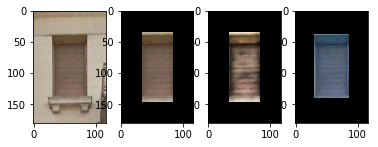

(145, 117, 3)
(145, 117, 3)
thickness:  30
IOU_Score:  0.8746603260869565


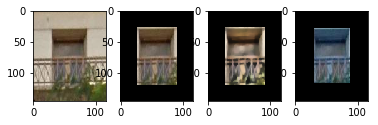

(171, 125, 3)
(171, 125, 3)
thickness:  30
IOU_Score:  0.8682795698924731


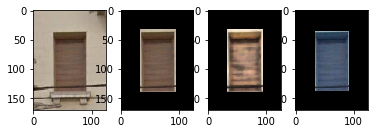

(175, 122, 3)
(175, 122, 3)
thickness:  30
IOU_Score:  0.914814239079745


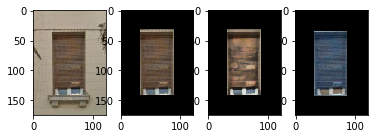

(168, 128, 3)
(168, 128, 3)
thickness:  30
IOU_Score:  0.7640358014646054


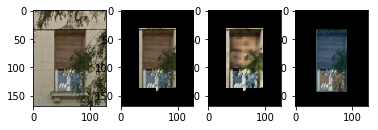

(112, 98, 3)
(112, 98, 3)
thickness:  30
IOU_Score:  0.9100568322213985


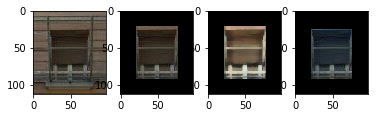

In [86]:
from skimage import exposure

thickness = 30


for i in range(6):
    img, poly = wd[i]
    rect = get_rect_from_poly(wd.polygon(i))
    np_im = np.array(img)
    #without adaptive histogram equalization
    mask = np.zeros(np_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(np_im.shape[0]):
        for c in range(np_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(np_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img = np_im*mask[:,:,np.newaxis]
    
    #with adaptive histogram equalization + denoising
    filtered_im = (255*denoise_tv_chambolle(exposure.equalize_adapthist(np_im, clip_limit=0.03), weight=0.1, multichannel=True)).astype(np.uint8)
    
    mask = np.zeros(filtered_im.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    for r in range(filtered_im.shape[0]):
        for c in range(filtered_im.shape[1]):
            if rect[0] <= c <= (rect[0]+rect[2]) and rect[1] <= r <= (rect[1]+rect[3]):
                # inside rect
                mask[r, c] = cv2.GC_FGD
            elif (c-thickness) >= rect[0] and (c+thickness) <= (rect[0]+rect[2]) and (r-thickness) >= rect[1] and (r+thickness) >= (rect[1] + rect[3]):
                # within ribbon
                mask[r, c] = cv2.GC_PR_BGD
            else:
                mask[r, c] = cv2.GC_BGD
    mask, bgdModel, fgdModel = cv2.grabCut(filtered_im,mask,rect,bgdModel,fgdModel,25,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img2 = filtered_im*mask[:,:,np.newaxis]
    
    # show images
    f = plt.figure()
    f.add_subplot(1,4, 1)
    plt.imshow(img)
    f.add_subplot(1,4, 2)
    plt.imshow(final_img)
    f.add_subplot(1, 4, 3)
    plt.imshow(final_img2)
    gt_img, score = calculate_iou(final_img2, annotated_list[i])
    f.add_subplot(1,4,4)
    plt.imshow(gt_img)
    print('thickness: ', thickness)
    print('IOU_Score: ', score)
    plt.show()


# Finally we test the idea of using multiple masks to find multiple windows instead versus using one big rect to find the window. We have to annotate the pictures ourselves for this one. Thats why we only be able to test on a small set of data

merged/acoruna_spain-000004-000045-22WQvYMnjiiDd_DAIXc-9g.jpg


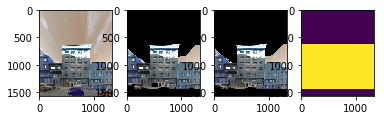

merged/acoruna_spain-000006-000008-0PeDlragfZWpR9fYXjePaA.jpg


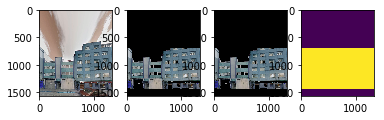

merged/amsterdam_netherlands-000029-000010-0hBG9q9dihlNW7PYXGcPXA.jpg


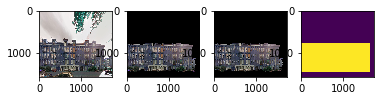

merged/amsterdam_netherlands-000059-000032-ZXDcDEN8BtHvyl8eu57JzQ.jpg


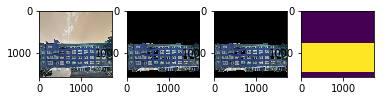

merged/amsterdam_netherlands-000095-000092-2702M3pbuH0cGLAB-f35Jg.jpg


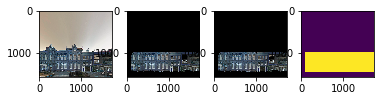

In [9]:
image_list = [
    ("merged/acoruna_spain-000004-000045-22WQvYMnjiiDd_DAIXc-9g", (0, 620, 1339,830)),
    ("merged/acoruna_spain-000006-000008-0PeDlragfZWpR9fYXjePaA",(0, 688,1339, 762)),
    ("merged/amsterdam_netherlands-000029-000010-0hBG9q9dihlNW7PYXGcPXA",(0, 787,1628, 670)),
    ("merged/amsterdam_netherlands-000059-000032-ZXDcDEN8BtHvyl8eu57JzQ",(0, 787, 1733, 670)),
    ("merged/amsterdam_netherlands-000095-000092-2702M3pbuH0cGLAB-f35Jg",(100, 984, 1633, 466))
]

for i in range(5):
    print(image_list[i][0] + ".jpg")
    img = cv2.imread(image_list[i][0] + ".jpg")
   
    
    #with rect
    rect = image_list[i][1]
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    mask, bgdModel, fgdModel = cv2.grabCut(img,mask, rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img = img*mask[:,:,np.newaxis]
    
    # with multiple masks
    mask = np.zeros(img.shape[:2],np.uint8)
    newmask = cv2.imread(image_list[i][0] + "_altered.jpg")
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if rect[0] <= c <= (rect[0] + rect[2]) and rect[1] <= r <= (rect[1] + rect[3]):
                mask[r, c] = cv2.GC_PR_FGD
            else:
                mask[r, c] = cv2.GC_BGD
            if newmask[r, c, 0] == 1 and newmask[r, c, 1] == 1 and newmask[r, c, 2] == 1:
                mask[r, c] = cv2.GC_FGD
    saved_mask = np.copy(mask)
    #saved_mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final_img2 = img*mask[:,:,np.newaxis]
    
    # show images
    f = plt.figure()
    f.add_subplot(1,4, 1)
    plt.imshow(img)
    f.add_subplot(1,4, 2)
    plt.imshow(final_img)
    f.add_subplot(1, 4, 3)
    plt.imshow(final_img2)
    f.add_subplot(1, 4, 4)
    plt.imshow(saved_mask)
    plt.show()
    